<a href="https://colab.research.google.com/github/USchiffer/UAS_Machine_Learning/blob/main/Machine_Learning_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset Iris
iris = load_iris()

# Konversi ke DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Tampilkan 5 data teratas
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Informasi dataset
df.info()

# Statistik deskriptif
df.describe()

# Cek missing value
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [18]:
X = df.drop('target', axis=1)
y = df['target']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=3,
    criterion='gini',
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



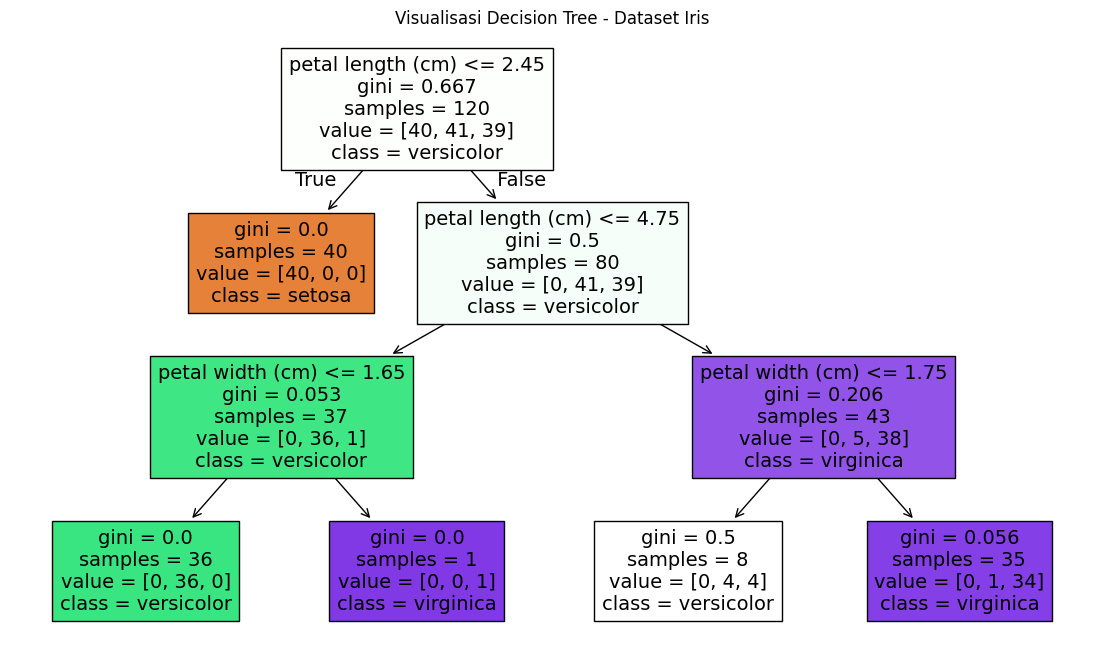

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.show()
